EDA

1.   Do customers with children/babies tend to cancel more ?
2.   Customers booking through which distribution channel cancel the most ?
3.   Among the repeated guests, what is the likeliness of cancellation ?
4.   Country wise cancellation and menu preferences stats 
5.   Cancellation trends of both the hotel types 

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
dataset=pd.read_csv('hotel_bookings.csv')
x=dataset.iloc[:,[0,2,4,7,8,9,10,11,14,15,16,17,18,21,22,25,26,27,28,29]].values
y=dataset.iloc[:,1].values
z=dataset.iloc[:,[19,20]]  #z will remain a DataFrame that contains the room_assigned and room_booked columns only

In [ ]:
df= pd.DataFrame(dataset)
df.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [ ]:
values={'children':0,'country':'Unknown','company':'unknown','agent':'unknown'}
df=df.fillna(value=values)
df.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
agent                             0
company                           0
days_in_waiting_list              0
customer_type                     0
adr                         

 Do customers with children/babies tend to cancel more ?

In [ ]:
print("The corelation between babies/children and is_canceled:\n",df.corr()["is_canceled"][["children","babies"]])
df1= df[['children','babies','is_canceled']]
cancel_children = list(df1.loc[(df1["children"]+df1["babies"]!=0) & df["is_canceled"]==1].index)
percent=float(round(len(cancel_children)/len(dataset)*100,2))
print("The percentage of customers who had children/babies and cancelled bookings: ",percent)

The corelation between babies/children and is_canceled:
 children    0.005036
babies     -0.032491
Name: is_canceled, dtype: float64
The percentage of customers who had children/babies and cancelled bookings:  2.73


Customers booking through which agency cancel the most ?

In [ ]:
distribution_cancel =df[["distribution_channel","is_canceled"]]
distribution_cancel =distribution_cancel[distribution_cancel["is_canceled"]==1]
distribution_cancel.groupby("distribution_channel")["is_canceled"].value_counts().sort_values(ascending=False)

In [ ]:
sns.swarmplot(x=df1['is_canceled'],y=df1['children'])

Among the repeated guests, what is the likeliness of cancellation ?

In [ ]:
repeated_guest =df[["is_repeated_guest","is_canceled"]]
count_values=pd.DataFrame(repeated_guest.groupby("is_repeated_guest")["is_canceled"].value_counts().sort_values(ascending=False))
percent = float(round(count_values.iloc[3]/(count_values.iloc[2]+count_values.iloc[3])*100,2))
print("Percentage of repeated guests who tend to cancel:",percent)

Percentage of repeated guests who tend to cancel: 14.49


Country wise cancellation and menu preferences stats

In [ ]:
country_total_bookings=pd.DataFrame(df["country"].value_counts(),index=None)
country_total_bookings.rename(columns={"country": "Number of Guests"}, inplace=True)
country_Canceled_bookings=pd.DataFrame(df.loc[df["is_canceled"] == 1]["country"].value_counts())
country_Canceled_bookings.rename(columns={"country": "Number of cancelled Guests"}, inplace=True)
final=pd.merge(country_total_bookings,country_Canceled_bookings,how="outer",left_index=True, right_index=True)
final["Percentage of cancellations"]=(round(final["Number of cancelled Guests"]/final["Number of Guests"]*100,2))
countries=list(final.sort_values(by=["Number of Guests"],ascending=False).head(n=10).index)
top10=final.sort_values(by=["Number of Guests"],ascending=False).head(n=10)
top10

,Number of Guests,Number of cancelled Guests,Percentage of cancellations
PRT,48590,27519.0,56.64
GBR,12129,2453.0,20.22
FRA,10415,1934.0,18.57
ESP,8568,2177.0,25.41
DEU,7287,1218.0,16.71
ITA,3766,1333.0,35.40
IRL,3375,832.0,24.65
BEL,2342,474.0,20.24
BRA,2224,830.0,37.32
NLD,2104,387.0,18.39


In [ ]:
top10.drop_index

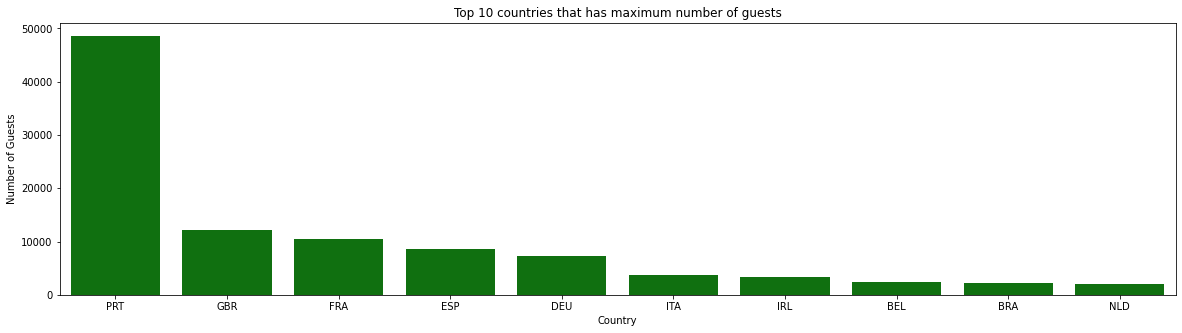

In [ ]:
plt.figure(figsize=(20,5))
plt.title("Top 10 countries that has maximum number of guests")
plt.xlabel("Country")
plt.ylabel("Number of Guests")
sns.barplot(x=top10.index,y=top10['Number of Guests'],color='green')

In [ ]:
df3=df.groupby(["country"])["meal"].value_counts()
df3[countries]

country  meal     
BEL      BB            1882
         SC             248
         HB             210
         FB               1
         Undefined        1
BRA      BB            1743
         SC             414
         HB              64
         Undefined        2
         FB               1
DEU      BB            4702
         HB            1786
         SC             797
         FB               1
         Undefined        1
ESP      BB            5939
         HB            1438
         SC             751
         Undefined      297
         FB             143
FRA      BB            8009
         SC            1304
         HB            1006
         Undefined       91
         FB               5
GBR      BB            9038
         HB            1612
         SC            1434
         FB              25
         Undefined       20
IRL      BB            2779
         SC             381
         HB             212
         FB               2
         Undefined        1
I

Cancellation trends of both the hotel types

In [ ]:
rh=df[df["hotel"]=="Resort Hotel"]
ch=df[df["hotel"]=="City Hotel"]

rh_canceled=rh["is_canceled"].sum()
ch_canceled=ch["is_canceled"].sum()
p1=float(round(rh_canceled/len(rh)*100,2))
p2=float(round(ch_canceled/len(ch)*100,2))
print("Percentage of customers canceling Resort Hotels :",p1)
print("Percentage of customers canceling City Hotels   :",p2)

rh_max =rh["arrival_date_month"].sum()

Percentage of customers canceling Resort Hotels : 27.76
Percentage of customers canceling City Hotels   : 41.73


In [ ]:
rh_max =pd.DataFrame(rh.groupby("arrival_date_month").count())
rh_max=rh_max["hotel"]
ch_max =pd.DataFrame(ch.groupby("arrival_date_month").count())
ch_max=ch_max["hotel"]
final=pd.merge(rh_max,ch_max,how="outer",left_index=True, right_index=True)
final.rename(columns={"hotel_x":"RH_bookings",
              "hotel_y":"Ch_bookings"},inplace=True)
final = final.loc[["January", "February", "March", "April", "May", "June", 
          "July", "August", "September", "October", "November", "December"], :]
final

,RH_bookings,Ch_bookings
arrival_date_month,,
January,2193,3736
February,3103,4965
March,3336,6458
April,3609,7480
May,3559,8232
June,3045,7894
July,4573,8088
August,4894,8983
September,3108,7400


In [ ]:
final = final.loc[["January", "February", "March", "April", "May", "June", 
          "July", "August", "September", "October", "November", "December"], :]
final

,RH_bookings,Ch_bookings
arrival_date_month,,
January,2193,3736
February,3103,4965
March,3336,6458
April,3609,7480
May,3559,8232
June,3045,7894
July,4573,8088
August,4894,8983
September,3108,7400


Handling Null values

In [ ]:
# for numerical values, we replace the null values with a constant
from sklearn.impute import SimpleImputer
imputer= SimpleImputer(strategy='constant',fill_value=0.0)
imputer.fit(x[:,[1,3,4,5,6,7,10,11,12,13,15,17,18,19]])
x[:,[1,3,4,5,6,7,10,11,12,13,15,17,18,19]]=imputer.transform(x[:,[1,3,4,5,6,7,10,11,12,13,15,17,18,19]])

In [ ]:
#for categorical values, replace null value with "Unknown"
impute= SimpleImputer(strategy='constant',fill_value='Unknown')
impute.fit(x[:,[0,2,8,9,14,16]])
x[:,[0,2,8,9,14,16]]=impute.transform(x[:,[0,2,8,9,14,16]])

In [ ]:
#If the alloted room is not same as the requested room, then 1 else 0
change=[]
for i in z.index:
  if(z.iloc[i][0] != z.iloc[i][1]):
    change.append(1)
  else :
    change.append(0)

In [ ]:

'''since change is a list,converting it into an ndArray so as to append it to the feature variable x
reshaping it to convert the vector change to 2D array change
appending this new column to the feature variable x'''
change=np.array(change)
change=np.reshape(change,(119390,1))  
x=np.append(arr=x,values=change,axis=1)    

Encoding categorical values using Label Encoder and OneHotEncoder

In [ ]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
x[:,0]=le.fit_transform(x[:,0])     #encoding hotel column
x[:,2]=le.fit_transform(x[:,2])     #month
x[:,14]=le.fit_transform(x[:,14])   #deposit type

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct=ColumnTransformer(transformers=[('encoder',OneHotEncoder(handle_unknown='ignore'),[8])],remainder='passthrough')  #encoding market segment
x=np.array(ct.fit_transform(x))

In [ ]:
 #To remove dummy variable trap in market segment
x=x[:,1:]      
x[2136]    

array([0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1, 87, 10, 0, 1, 2, 0.0, 0,
       'TA/TO', 0, 0, 0, 0, 1, 0, 'Transient', 36.05, 0, 0, 0, 0],
      dtype=object)

In [ ]:
ct=ColumnTransformer(transformers=[('encoder',OneHotEncoder(),[15])],remainder='passthrough')  #encoding distribution channel
x=np.array(ct.fit_transform(x))

In [ ]:
temp1= x[:,np.arange(0,7)]
temp2=x[:,np.arange(8,31)]

In [ ]:
x=np.concatenate((temp1,temp2),axis=1)

In [ ]:
ct=ColumnTransformer(transformers=[('encoder',OneHotEncoder(),[25])],remainder='passthrough')  #encoding customer type
x=np.array(ct.fit_transform(x))

In [ ]:
temp1= x[:,np.arange(0,11)]
temp2=x[:,np.arange(12,33)]
x=np.concatenate((temp1,temp2),axis=1)

In [ ]:
imputer.fit(x[:,20:21])
x[:,20:21]=imputer.transform(x[:,20:21])

In [ ]:
x=x.clip(0)

Splitting the dataset into train and test sets

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test =train_test_split(x,y,test_size=0.2,random_state=0)
x_train.shape

(95512, 32)

Feature Selection

[2.23598017e-03 8.28314740e-04 1.50031925e-02 1.32993023e-02
 1.75259312e-03 8.95557926e-03 1.80947031e-04 1.72444408e-02
 5.54099404e-05 6.54309404e-04 2.79038181e-03 1.33443578e-02
 2.05225947e-02 8.91993430e-06 1.55605974e-02 1.93326216e-01
 6.80478634e-02 3.51810727e-02 6.50363564e-02 2.04857768e-02
 9.35485101e-03 1.35937915e-03 4.91355492e-03 3.57720210e-02
 2.49249586e-03 2.68810060e-02 1.31735946e-01 4.24340774e-03
 1.46642928e-01 2.33589620e-02 7.31795775e-02 4.55516648e-02]


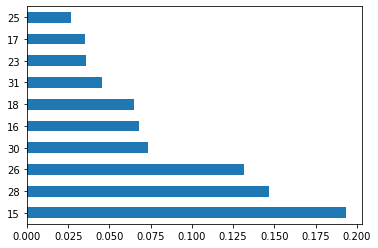

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(temp,y_train)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=temp.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()
#lead_time, adr,depo_type,spl requests,month

In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
temp=pd.DataFrame(x_train)
bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(temp,y_train)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(temp.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(10,'Score').sort_values(by='Score')) 
#16,17,18  27,30,24,29

    Specs          Score
29     29    3502.110506
25     25    3890.025854
31     31    5055.726899
28     28    5149.812982
24     24    5230.624751
30     30    5951.555888
23     23    9409.712466
26     26   18834.282214
27     27   39686.659189
15     15  885837.849872


In [ ]:
x_train=x_train[:,[15,27,26,23,30,24,28,31,25,29]]
x_test=x_test[:,[15,27,26,23,30,24,28,31,25,29]]
x_train.shape

(95512, 10)

Building different models and evaluating it using  confusion_matrix & K fold cross evaluation

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
classifier=LogisticRegression(random_state=0)
classifier.fit(x_train,y_train)
acc=cross_val_score(estimator=classifier,X=x_train,y=y_train,cv=10)
acc.mean()
#77.64

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


array([[14346,   588],
       [ 4798,  4146]])

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
classifier =SVC(kernel='rbf',random_state=0)
classifier.fit(x_train,y_train)
y_pred=classifier.predict(x_test)
cm = confusion_matrix(y_test,y_pred)
cm
#68.8

array([[14080,   854],
       [ 6591,  2353]])

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
rf= RandomForestClassifier(random_state=0,criterion='entropy')
rf.fit(x_train,y_train)
acc=cross_val_score(estimator=rf,X=x_train,y=y_train,cv=10)
acc.mean()
#81.4

0.8149552728316465

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
classifier= DecisionTreeClassifier(random_state=0)
classifier.fit(x_train,y_train)
acc=cross_val_score(estimator=classifier,X=x_train,y=y_train,cv=10)
acc.mean()
#80.21

0.8021610074593818

Choosing the optimal hyper parameter values


In [ ]:
from sklearn.model_selection import GridSearchCV
parameters =[{'criterion':['gini']},
            {'criterion':['entropy']}]
gsearch =GridSearchCV(estimator=rf,
                      param_grid =parameters,
                      scoring= 'accuracy',
                      cv=10,
                      n_jobs=-1)
gsearch =gsearch.fit(x_train,y_train)
best_accuracy =gsearch.best_score_
best_param = gsearch.best_params_
print(best_accuracy,best_param)

0.8175517809969121 {'criterion': 'entropy'}
